In [1]:
import numpy as np
from numpy import pi, sqrt, exp, arcsin, arctan, arccos
import numpy.ma as ma
from scipy import stats
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.use('pgf')
if mpl.get_backend() == 'pgf':
    pass
else:
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'
    
FIGURE_PATH='figures/'
DATA_PATH='data/'

from scipy.constants import h, m_e, k, N_A, pi, e, hbar, u, k, mu_0

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2
from scipy.special import gamma
from itertools import product
import scipy.odr as odr

In [2]:
def sf(x):
    # calculate significant figures
    # return: decimal place to be rounded to
    if isinstance(x, float) or isinstance(x,int):
        if x == 0:
            return 20 
        else:
            return int(-1 * np.floor(np.log10(x)) + 1)
    else:
        return (-1 * np.floor(np.log10(np.min(ma.masked_where(x==0,x)))) + 1).astype(int)

In [3]:
def cm2inch(lst):
    inch = 2.54
    if isinstance(lst, list):
        return [x/inch for x in lst] 
    elif isinstance(lst, float):
        return lst/inch

default_width =  cm2inch(21/sqrt(2)) # 5.78853 # approx 14.7cm
default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean
print(default_width)

5.846158427132873


In [4]:
default_width = cm2inch(21/sqrt(2))
default_ratio = default_ratio = (sqrt(5.0) - 1.0) / 2.0 # golden mean

In [5]:
from matplotlib import rcParams
from matplotlib import cycler
if mpl.get_backend() == 'pgf':
    rcParams.update({'legend.loc' : 'best'})
    rcParams.update({
        "text.usetex": True,
        "pgf.texsystem": "xelatex",
        "pgf.rcfonts": False,
        "font.family": "serif",
        "font.serif": [],
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": [default_width, default_width * default_ratio],
        "pgf.preamble": [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
        ],
        "figure.constrained_layout.use": True,
    })
    rcParams.update({'savefig.bbox' : 'standard'})
    rcParams.update({'savefig.pad_inches' : 0.0})
else:
    rcParams.update({'figure.autolayout': True})
    rcParams.update({'figure.figsize' : [15,9.47]})
    rcParams.update({'font.size' : 16})
rcParams.update({'errorbar.capsize' : 4})
rcParams.update({'legend.loc' : 'best'})
rcParams.update({'axes.prop_cycle': cycler('color', ["#cf115d", "#786eb3", "#bce333", "#99c1b8", "#0cc0aa", "#8547d9", "#76f014", "#ea85f5"])})

###### Fit function to data
```
def fit_function(x, param1, param2, param3):
    return param1*x**param3 + param2 

popt, pcov = curve_fit(fit_function, x, y, sigma = error_array)

param1 = popt[0]
param1_err = pcov[0][0]
```

###### Plot data

```
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

# plots
plt.errorbar(x, y, linestyle='none', marker='.', yerr=error_array)
plt.plot(x,fit_function(x, *popt))

# options
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('title')
# plt.xticks(x)
# plt.yscale('log') # set y scale to logarithmic
plt.legend()

# save and show
filename='filename'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.savefig(FIGURE_PATH+filename+'.jpg', format='jpg')
plt.show()
```

###### Load .txt data into arrays
```
data1, data2 = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,1), unpack=True)
```

###### Significant Figures
```
print(f"val: {round(val,sf(val_err))} +/- {round(val_err,sf(val_err))}")
```

# Teil 6: Resonanzüberhöhung

In [6]:
frequenz_R , effektivwert_R , effekivwert_log_R = np.loadtxt(DATA_PATH+'Messung6_Resonanzueberhoehung.txt',
                                                                skiprows=1,
                                                                max_rows=91,
                                                                unpack=True)

frequenz_C , effektivwert_C , effekivwert_log_C = np.loadtxt(DATA_PATH+'Messung6_Resonanzueberhoehung.txt',
                                                                   skiprows=93,
                                                                   max_rows=91, 
                                                                   unpack=True)

frequenz_L , effektivwert_L , effekivwert_log_L = np.loadtxt(DATA_PATH+'Messung6_Resonanzueberhoehung.txt',
                                                                skiprows=185,
                                                                max_rows=91,
                                                                unpack=True)

In [7]:
versuche = [] 

versuch = {
    'label': 'R',
    'R_ges': 110,
    'R_ges_err': 4,
    'R': 220, 
    'R_err': 0.05 * 220,
    'C': 47e-9,
    'C_err': 0.01 * 47e-9,
    'frequenz': frequenz_R,
    'effektivwert': effektivwert_R ,
}
versuche.append(versuch)

versuch = {
    'label': 'L',
    'R_ges': 110,
    'R_ges_err': 4,
    'R': 220, 
    'R_err': 0.05 * 220,
    'C': 47e-9,
    'C_err': 0.01 * 47e-9,
    'frequenz': frequenz_L,
    'effektivwert': effektivwert_L ,
}
versuche.append(versuch)

versuch = {
    'label': 'C', 
    'R_ges': 110,
    'R_ges_err': 4,
    'R': 220, 
    'R_err': 0.05 * 220,
    'C': 47e-9,
    'C_err': 0.01 * 47e-9,
    'frequenz': frequenz_C,
    'effektivwert': effektivwert_C ,
}
versuche.append(versuch)

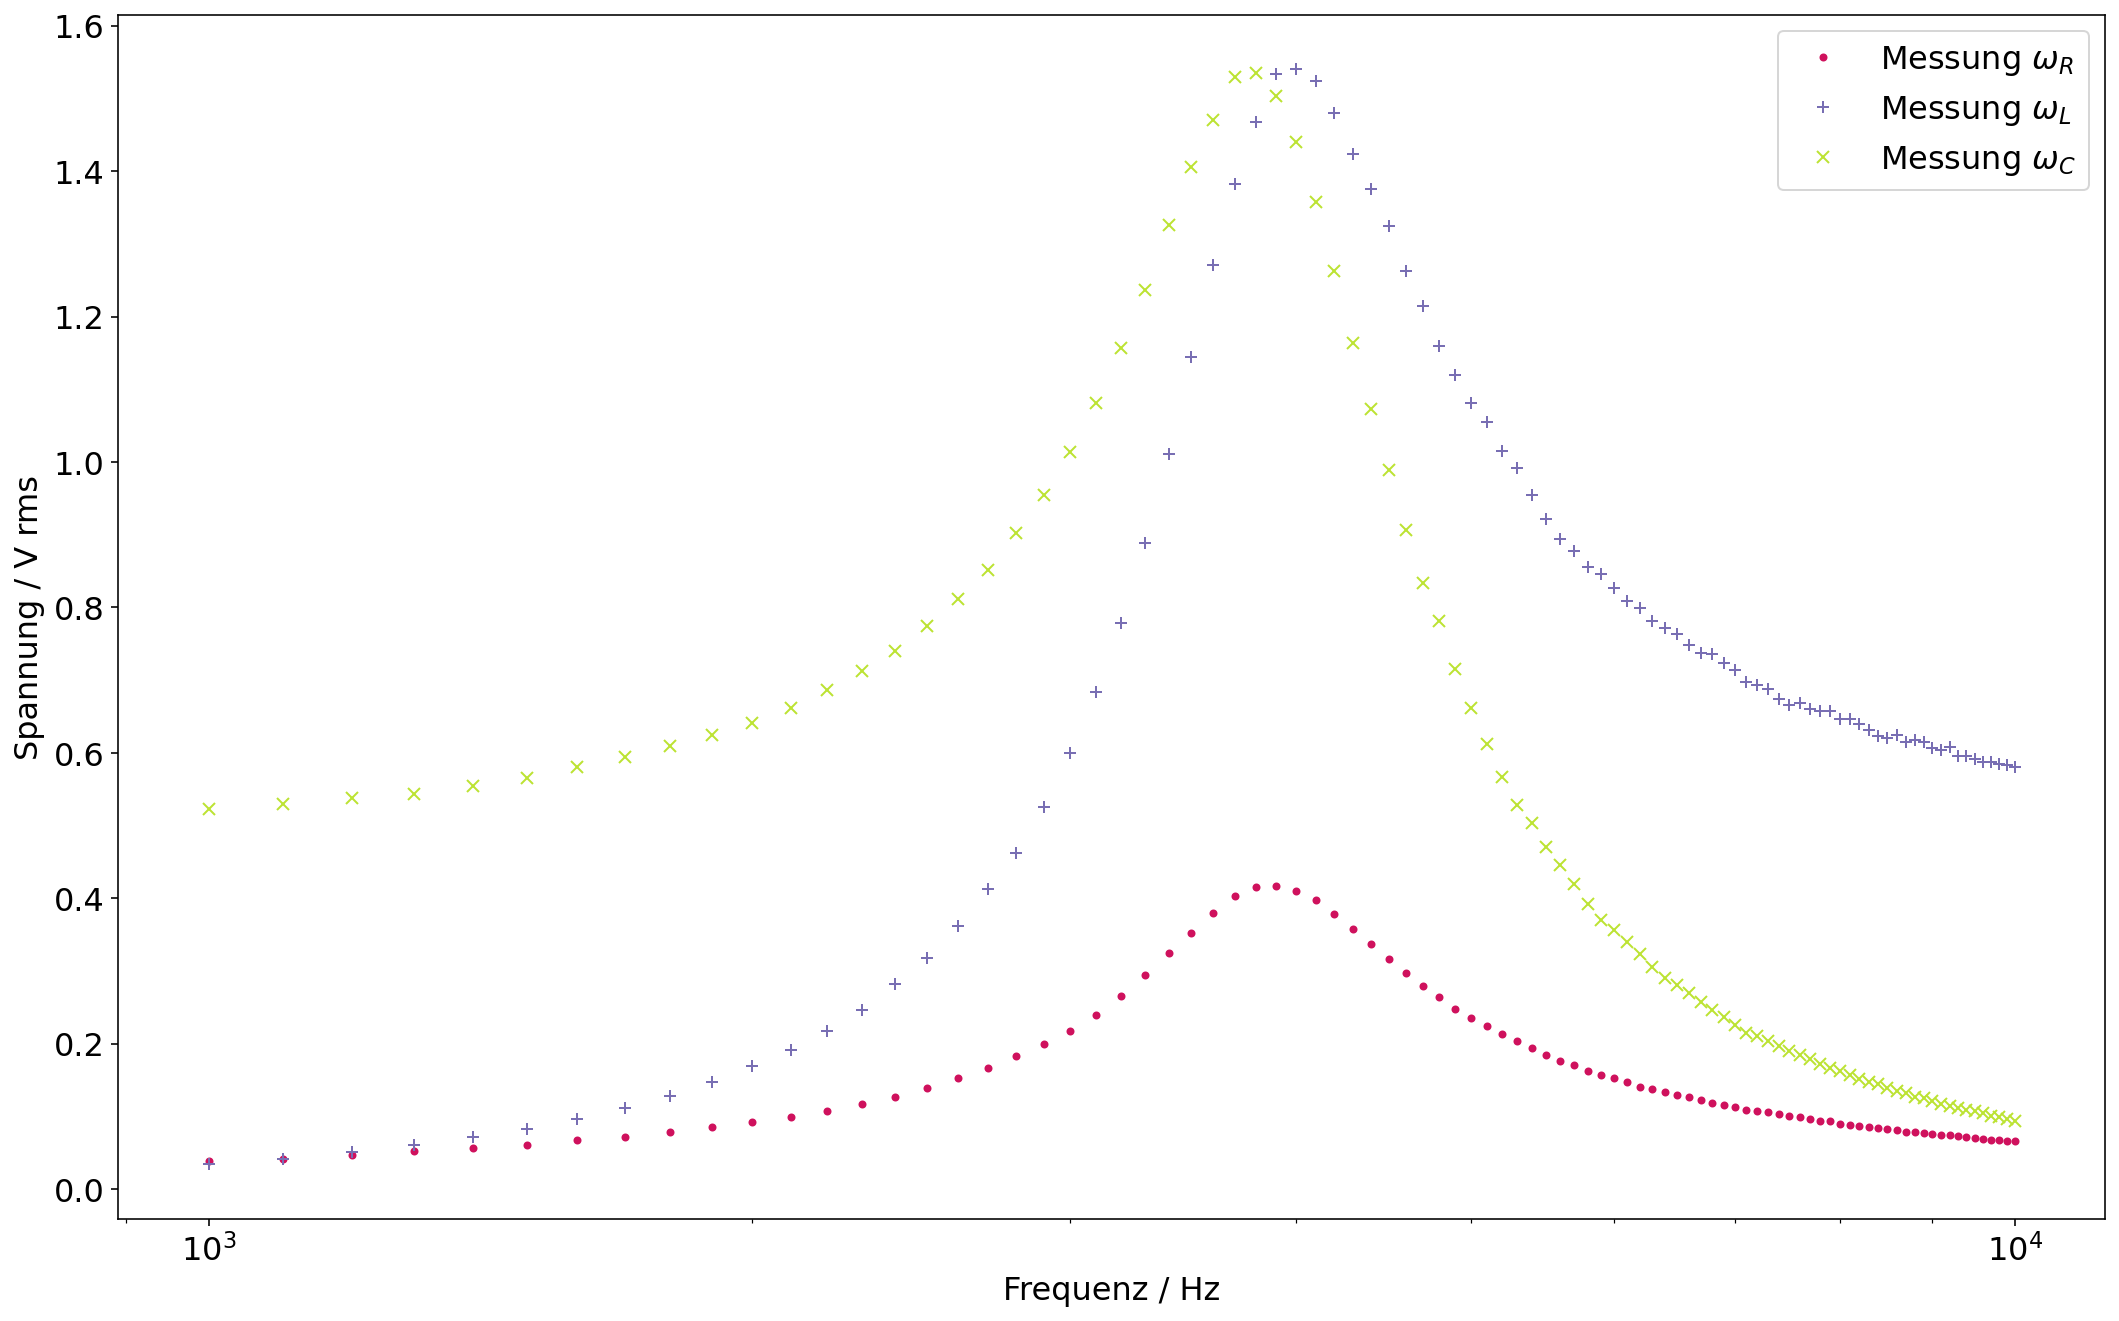

In [8]:
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))

marker = ['.', '+', 'x']
for i, v in enumerate(versuche): 
    plt.plot(v['frequenz'] , v['effektivwert'],  linestyle = "None" , marker = marker[i] , label = fr"Messung $\omega_{{{v['label']}}}$")

plt.xscale("log")
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.legend()

# save and show
filename='messung6_mess'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()

plt.show()

In [9]:
def fit_func_R(B, x):
    U0, R_ges, L = B
    return U0 * R_ges / np.sqrt(R_ges**2 + (2*pi*x*L - 1 / (2*pi*x * C))**2)# + offset
versuche[0]['fit_func'] = fit_func_R

def fit_func_L(B, x):
    U0, R_ges, L = B
    return U0 * 2*pi*x * L / np.sqrt(R_ges**2 + (2*pi*x*L - 1 / (2*pi*x * C))**2)# + offset
versuche[1]['fit_func'] = fit_func_L

def fit_func_C(B, x):
    U0, R_ges, L = B
    return U0 * 1 / (2*pi*x * C) / np.sqrt(R_ges**2 + (2*pi*x*L - 1 / (2*pi*x * C))**2)# + offset
versuche[2]['fit_func'] = fit_func_C


U_R
U0:     0.4158344953420497 +/- 0.0011127900120482185 Vrms
R_ges:  295.0153840830473 +/- 1.4761642809295035 Ohm
L :     0.03526078192347523 +/- 5.148051835834524e-05 H

U_L
U0:     0.5033186898041624 +/- 0.0009395472914230622 Vrms
R_ges:  286.9252749896419 +/- 1.0366604969800026 Ohm
L :     0.03529110402184581 +/- 4.475074407800968e-05 H

U_C
U0:     0.4941289563548819 +/- 0.001530785664111234 Vrms
R_ges:  284.93593286713786 +/- 1.3991594480132663 Ohm
L :     0.03517351381793149 +/- 5.346914551932003e-05 H


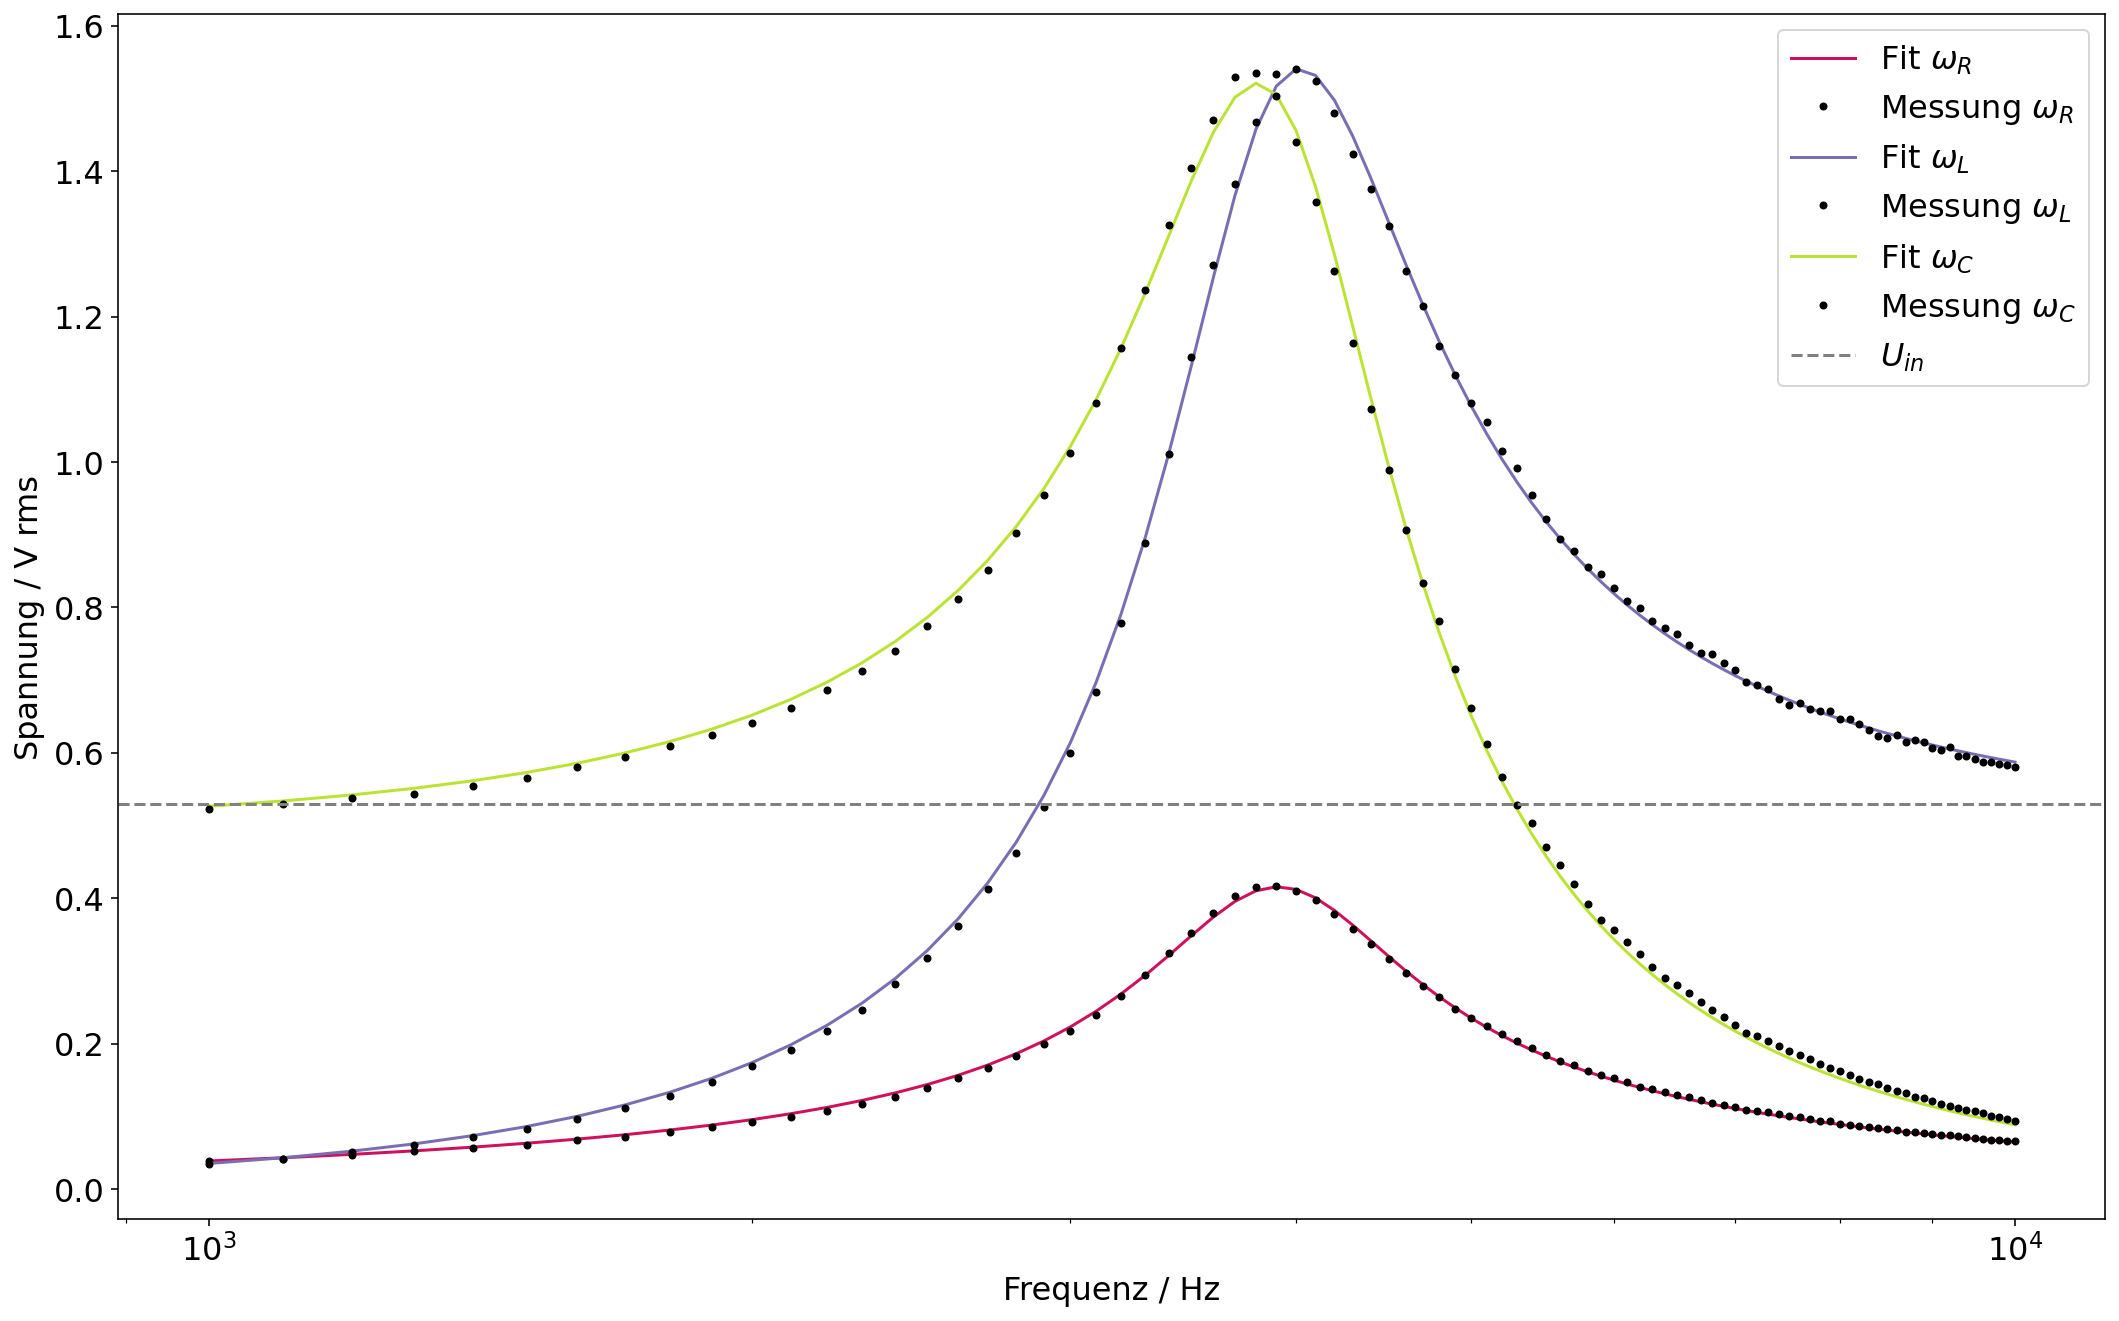

In [10]:
# initiate figure
if mpl.get_backend() == 'pgf':
    plt.clf()
    plt.figure(figsize=(default_width, default_width*default_ratio))
    
for v in versuche:
    frequenz = v['frequenz']
    effektivwert = v['effektivwert']
    fit_func = v['fit_func'] 
    C = v['C']
    
    model = odr.Model(fit_func)

    data = odr.Data(frequenz, effektivwert, we=0.005, wd=10)

    case = odr.ODR(data, model, beta0=[0.6, 150.0, 0.034]) #, 47e-9])

    output = case.run()
    
    v['U0']        = output.beta[0]
    v['U0_err']    = output.sd_beta[0]
    v['R_ges']     = output.beta[1]
    v['R_ges_err'] = output.sd_beta[1]
    v['L']         = output.beta[2]
    v['L_err']     = output.sd_beta[2]
    v['beta']      = output.beta
    v['sd_beta']   = output.sd_beta

    print(f'\nU_{v["label"]}')
    print(f'U0:     {output.beta[0]} +/- {output.sd_beta[0]} Vrms')
    print(f'R_ges:  {output.beta[1]} +/- {output.sd_beta[1]} Ohm')
    print(f'L :     {output.beta[2]} +/- {output.sd_beta[2]} H')

    plt.plot(frequenz, fit_func(output.beta, frequenz), label=fr'Fit $\omega_{{{v["label"]}}}$')    
    plt.plot(frequenz, effektivwert, linestyle='None', marker='.', label=fr'Messung $\omega_{{{v["label"]}}}$', color='black')


plt.axhline(y=0.53, label=r'$U_{in}$', linestyle='--', color='gray')
plt.xscale('log')
plt.xlabel('Frequenz / Hz')
plt.ylabel('Spannung / V rms')
plt.legend()

# save and show
filename='messung6_fit'
if mpl.get_backend() == 'pgf':
    plt.savefig(FIGURE_PATH+filename+'.pgf', format='pgf')
    plt.savefig(FIGURE_PATH+filename+'.pdf', format='pdf')
    plt.clf()
plt.show()

In [11]:
for v in versuche:
    beta = v['beta']
    fit_func = v['fit_func']
    
    F_RES = np.array([]) 

    beta = v['beta']
    sd_beta = v['sd_beta']

    for c_err in [0,1,-1]:
        beta0 = beta + c_err * sd_beta 

        def minfunc(x):
            return -1 * fit_func(beta0, x)

        f_res = optimize.fminbound(minfunc, 1000, 10000)
        
        F_RES = np.append(F_RES, f_res)

    f_res = np.mean(F_RES) 
    f_res_err = np.std(F_RES) / np.sqrt(len(F_RES))
        
    print(f'\nU_{v["label"]}')
    print(f'f_res =  {f_res} +/- {f_res_err}')


U_R
f_res =  3909.538212996645 +/- 1.3453665512576458

U_L
f_res =  4019.588138696515 +/- 0.8739848052125226

U_C
f_res =  3806.7400818920783 +/- 1.7911383580268079


### theoretisch

In [12]:
L = np.mean([v['L'] for v in versuche])
L_err_sys = 1/3 * np.sqrt(np.sum([v['L_err']**2 for v in versuche]))
L_err_stat = np.std([v['L'] for v in versuche]) / np.sqrt(3)

print(f'L = {L} +/- {L_err_sys} sys. +/- {L_err_stat:} stat.')
L_err = L_err_sys if L_err_sys >= L_err_stat else L_err_stat

R_ges = np.mean([v['R_ges'] for v in versuche])
R_ges_err_sys = 1/3 * np.sqrt(np.sum([v['R_ges_err']**2 for v in versuche]))
R_ges_err_stat = np.std([v['R_ges'] for v in versuche]) / np.sqrt(3)
print(f'R_ges = {R_ges} +/- {R_ges_err_sys} sys. +/- {R_ges_err_stat} stat.')

R_ges_err = R_ges_sys if R_ges_err_sys >= R_ges_err_stat else R_ges_err_stat

delta = R_ges / (2 * L) 
delta_err = delta * np.sqrt((R_ges_err/R_ges)**2 + (L_err/L)**2) 
print(f'delta = {delta} +/- {delta_err}')

C = 47e-9
C_err = 0.1 * C
R = R_ges 
R_err = R_ges_err 
f_R = np.sqrt(1 / (L * C)) / (2 * pi)
f_L = np.sqrt((2*pi*f_R)**2 + 2 * delta** 2)  / (2 * pi)
f_C = np.sqrt((2*pi*f_R)**2 - 2 * delta** 2)  / (2 * pi)


f_R_err = f_R * np.sqrt((1/2 * L_err/(2*L))**2 + (1/2 * C_err/(2*C))**2) 

f_L_err = 1 / (4 * pi) * 1 / np.sqrt((2*pi*f_R)**2 + 2 * delta**2) * np.sqrt((f_R_err * 2 * pi * 2 * f_R)**2
                                                                             + (delta_err * 2 * delta)**2)

f_C_err = 1 / (4 * pi) * 1 / np.sqrt((2*pi*f_R)**2 - 2 * delta**2) * np.sqrt((f_R_err * 2 * pi * 2 * f_R)**2
                                                                             + (delta_err * 2 * delta)**2)

print(f'f_R = {f_R} +/- {f_R_err}')
print(f'f_L = {f_L} +/- {f_L_err}')
print(f'f_C = {f_C} +/- {f_C_err}')

L = 0.03524179992108418 +/- 2.8890256697728198e-05 sys. +/- 2.8779241458744302e-05 stat.
R_ges = 288.95886397994235 +/- 0.7609477373830706 sys. +/- 2.5166312288709407 stat.
delta = 4099.660979674684 +/- 35.8630229209126
f_R = 3910.588889553617 +/- 97.76800720967242
f_L = 4017.98073448344 +/- 15.172707700483986
f_C = 3800.1633837928994 +/- 16.04237530693906
